In [1]:
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimSong']  # 设置中文字体为宋体
plt.rcParams['axes.unicode_minus'] = False

In [2]:
base_path = "../experiment/hyperparameter_learning"
data_name = "Toys_and_Games"
type = "reg"
checkpoint_dirs = [f"{base_path}/{data_name}/{type}/ckpt_new_ensrec_{type}{i}_{data_name}" for i in range(1, 11)]

/var/folders/f_/6239yyyn2sg39c3j_07kfc2r0000gn/T/ipykernel_6549/2681230191.py:33: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) Times New Roman.
  plt.tight_layout()
/var/folders/f_/6239yyyn2sg39c3j_07kfc2r0000gn/T/ipykernel_6549/2681230191.py:33: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) Times New Roman.
  plt.tight_layout()
/var/folders/f_/6239yyyn2sg39c3j_07kfc2r0000gn/T/ipykernel_6549/2681230191.py:33: UserWarning: Glyph 36229 (\N{CJK UNIFIED IDEOGRAPH-8D85}) missing from font(s) Times New Roman.
  plt.tight_layout()
/var/folders/f_/6239yyyn2sg39c3j_07kfc2r0000gn/T/ipykernel_6549/2681230191.py:33: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) Times New Roman.
  plt.tight_layout()
/var/folders/f_/6239yyyn2sg39c3j_07kfc2r0000gn/T/ipykernel_6549/2681230191.py:33: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Times New Roman.
  plt.tight_layout()
/var/

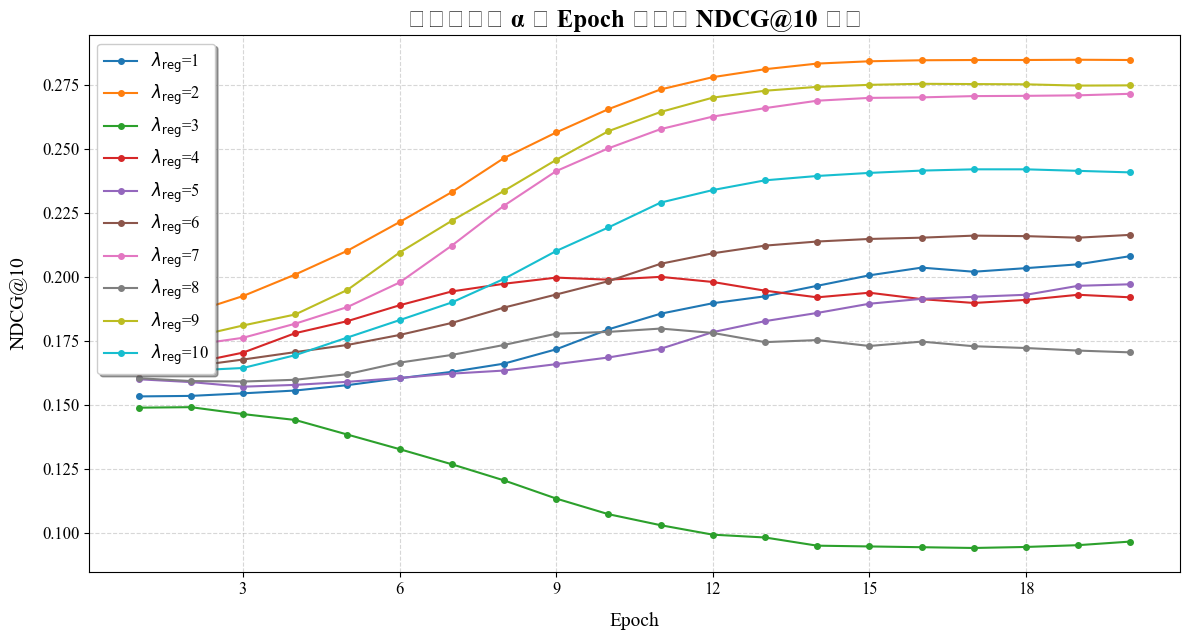

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6.5))

for checkpoint_dir in checkpoint_dirs:
    files = []
    for filename in os.listdir(checkpoint_dir):
        filename = filename.split('_')
        files.append((int(filename[0][5:]), float(filename[1][:-4])))
    files.sort()
    epochs, ndcgs = zip(*files)
    plt.plot(epochs, ndcgs, marker='o', markersize=4, label=f"$\\lambda_{{\\mathrm{{reg}}}}$={checkpoint_dir.split('_')[-4][3:]}", linestyle='-', linewidth=1.5)

# 设置标题和轴标签的字体大小
plt.title("不同超参数 α 随 Epoch 变化的 NDCG@10 表现", fontsize=18, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, labelpad=10)
plt.ylabel('NDCG@10', fontsize=14, labelpad=10)

plt.grid(alpha=0.5, linestyle='--')

plt.legend(fontsize=12, loc='best', frameon=True, shadow=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

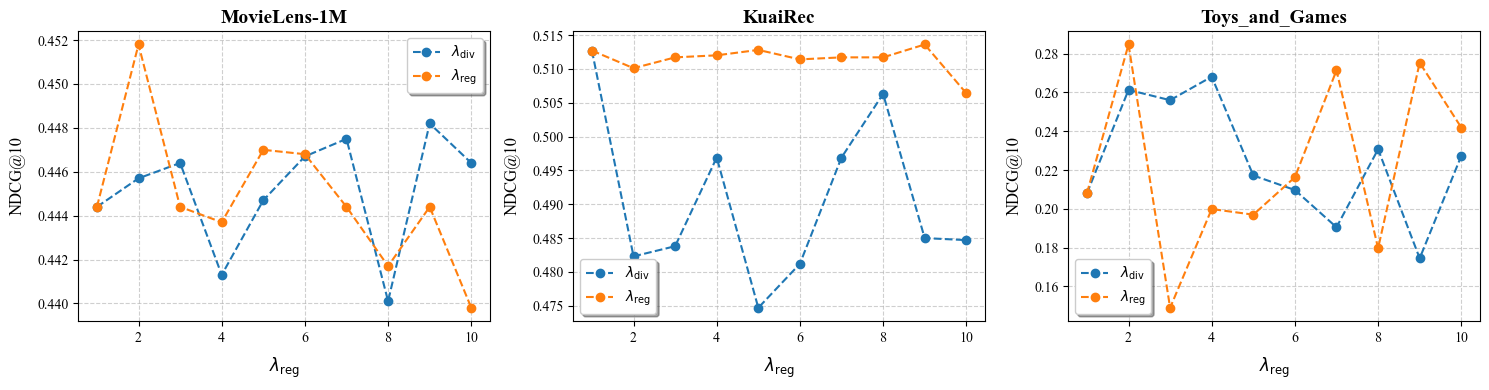

In [3]:
base_path = "../experiment/hyperparameter_learning/"
data_names = ['MovieLens-1M', "KuaiRec", "Toys_and_Games"]
type = ["div", 'reg']

plt.figure(figsize=(15, 4))  # 调整图表整体大小

for data_name in data_names:
    best_performances = []
    
    for t in type:  # 遍历每种类型
        checkpoint_dirs = [f"{base_path}{data_name}/{t}/ckpt_new_ensrec_{t}{i}_{data_name}" for i in range(1, 11)]

        for checkpoint_dir in checkpoint_dirs:
            files = []
            for filename in os.listdir(checkpoint_dir):
                filename = filename.split('_')
                files.append((int(filename[0][5:]), float(filename[1][:-4])))
            files.sort()
            epochs, ndcgs = zip(*files)
            best_performance = max(ndcgs)
            best_performances.append(best_performance)

        plt.subplot(1, len(data_names), data_names.index(data_name) + 1)
        plt.plot(range(1, 11), best_performances[-10:], marker='o', markersize=6, label=f"$\\lambda_{{\\mathrm{{{t}}}}}$", linestyle='--', linewidth=1.5)  # 美化线条和标记
        plt.title(data_name, fontsize=14, fontweight='bold')  # 设置标题字体大小和加粗
        plt.xlabel(f"$\\lambda_{{\\mathrm{{{t}}}}}$", fontsize=12, labelpad=8)  # 使用 LaTeX 格式化标签
        plt.ylabel('NDCG@10', fontsize=12, labelpad=8)
        plt.grid(alpha=0.6, linestyle='--')  # 设置网格线透明度和样式
        plt.legend(fontsize=10, loc='best', frameon=True, shadow=True)  # 美化图例

# 调整整体布局
plt.tight_layout()
plt.show()

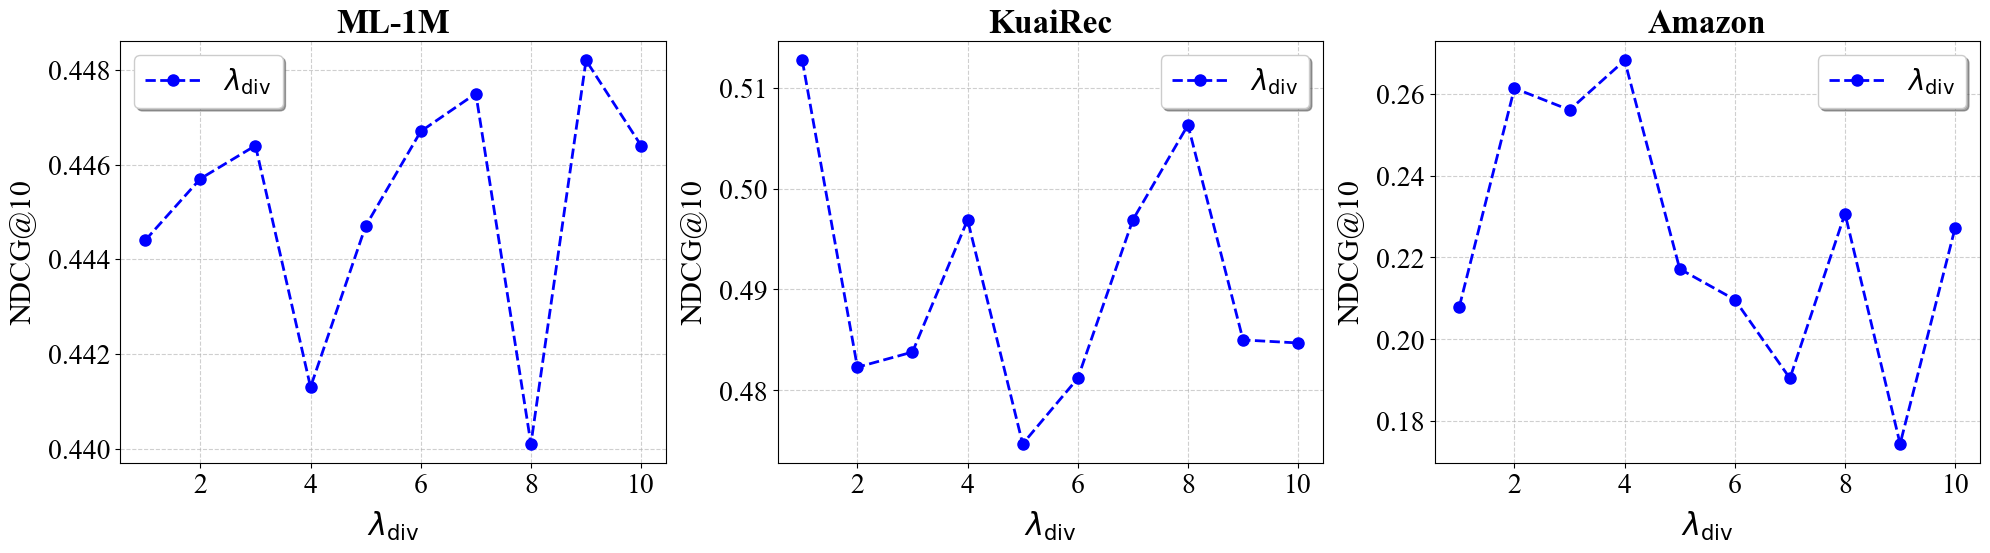

In [37]:
import os
import matplotlib.pyplot as plt

base_path = "../experiment/hyperparameter_learning/"
data_names = ['MovieLens-1M', "KuaiRec", "Toys_and_Games"]
figure_name = ['ML-1M', 'KuaiRec', 'Amazon']
types = ["div", 'reg']

# 定义颜色
type_colors = {"div": "blue", "reg": "red"}

plt.figure(figsize=(20, 10))  # 调整图表整体大小

for row, t in enumerate(types):  # 遍历每种类型
    if t == "reg":
        continue
    for col, data_name in enumerate(data_names):  # 遍历每个数据集
        best_performances = []
        checkpoint_dirs = [f"{base_path}{data_name}/{t}/ckpt_new_ensrec_{t}{i}_{data_name}" for i in range(1, 11)]

        for checkpoint_dir in checkpoint_dirs:
            files = []
            for filename in os.listdir(checkpoint_dir):
                filename = filename.split('_')
                files.append((int(filename[0][5:]), float(filename[1][:-4])))
            files.sort()
            epochs, ndcgs = zip(*files)
            best_performance = max(ndcgs)
            best_performances.append(best_performance)

        # 设置子图位置：第一行是 type="div"，第二行是 type="reg"
        plt.subplot(2, len(data_names), row * len(data_names) + col + 1)
        plt.plot(range(1, 11), best_performances[-10:], marker='o', markersize=8, label=f"$\\lambda_{{\\mathrm{{{t}}}}}$", linestyle='--', linewidth=2, color=type_colors[t])
        plt.title(figure_name[col], fontsize=24, fontweight='bold')  # 设置标题字体大小和加粗
        plt.xlabel(f"$\\lambda_{{\\mathrm{{{t}}}}}$", fontsize=22, labelpad=8)  # 使用通用标签
        plt.ylabel('NDCG@10', fontsize=22, labelpad=8)
        plt.tick_params(axis='x', labelsize=20)  # x轴坐标数字
        plt.tick_params(axis='y', labelsize=20)  # y轴坐标数字
        plt.grid(alpha=0.6, linestyle='--')  # 设置网格线透明度和样式
        plt.legend(fontsize=20, loc='best', frameon=True, shadow=True)  # 美化图例

# 调整整体布局
plt.tight_layout()
plt.show()